In [85]:
import torch
import brainbox
import numpy as np
import matplotlib.pyplot as plt
from stack import dataset, train, analysis

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [86]:
root = "/home/luketaylor/PycharmProjects/StackTP/results"

In [146]:
train_dataset_unfiltered = dataset.NaturalDataset(train=True, dt=30, filtered=False)
test_dataset_unfiltered = dataset.NaturalDataset(train=False, dt=30, filtered=False)

In [96]:
# Choose to load the prediction, autoencoder or slowness model
model_name = "prediction_4-6_True_False_2"
# model_name = "compression_4-6_True_False_8"
# model_name = "slowness_4-6_True_False"

log = brainbox.trainer.load_log(root, model_name)
model = train.Trainer.load_model(root, model_name)

In [144]:
# Get STRFS of layer 1, 2, 3 or 4
strfs = analysis.build_rfs(model, layer=2, device="cuda")

INFO:util:Processing batch 0 out of 4...
noise torch.Size([50, 100, 28, 28])
torch.Size([50, 100, 92, 1, 1])
INFO:util:Processing batch 1 out of 4...
noise torch.Size([50, 100, 28, 28])
torch.Size([50, 100, 92, 1, 1])
INFO:util:Processing batch 2 out of 4...
noise torch.Size([50, 100, 28, 28])
torch.Size([50, 100, 92, 1, 1])
INFO:util:Processing batch 3 out of 4...
noise torch.Size([50, 100, 28, 28])
torch.Size([50, 100, 92, 1, 1])


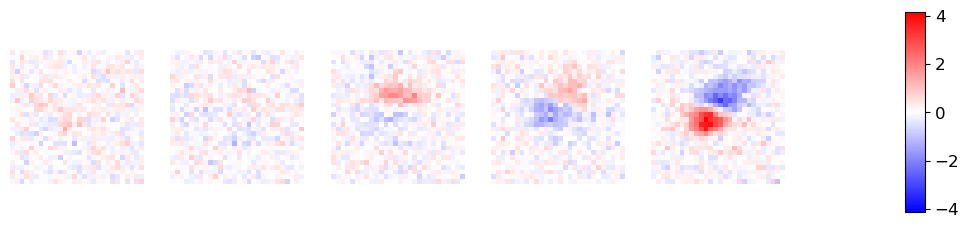

In [142]:
# View spatiotemporal RF.
analysis.plot_spatiotemporal_rf(strfs[0].cpu().detach())

In [145]:
# Can view all spatial RFs
# analysis.plot_spatial_rfs(strfs[:, -1].cpu().detach(), rows=10, cols=10, range_all=False)

## View model activity and output

In [190]:
x, _ = test_dataset_unfiltered[4]

In [198]:
with torch.no_grad():
    model = model.cpu()
    out = model(x.unsqueeze(0).cpu())

# Of first stack
output = out[0][0][0, 0].cpu().detach()
target = out[0][1][0, 0].cpu().detach()
hidden_activity = out[0][2][0, :, :, 23, 23].cpu().detach()

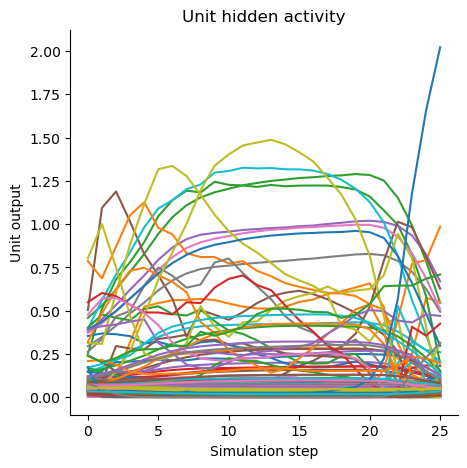

In [217]:
def plot_activity(title, ax):
    for i in range(100):
        plt.plot(h[i])
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    ax.set_xlabel("Simulation step")
    ax.set_ylabel("Unit output")
    ax.set_title(title)
    
fig, ax = plt.subplots(1, 1, figsize=(5, 5))
plot_activity("Unit hidden activity", ax)

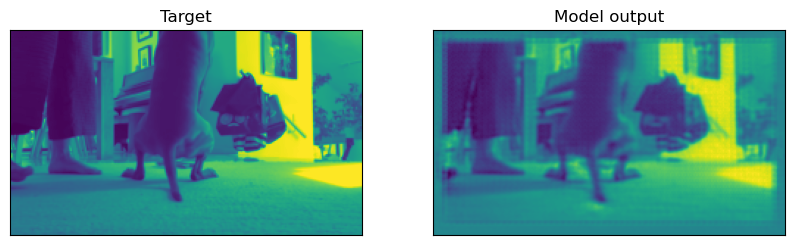

In [211]:
def plot_frame(img, title, ax):
    ax.imshow(img)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(title)
    
fig, axs = plt.subplots(1, 2, figsize=(10, 10))
plot_frame(target[-1], "Target", axs[0])
plot_frame(output[-1], "Model output", axs[1])